In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_1samp
import gc
SMOOTHING = 3

In [2]:
def clean_data(df):
    if "Unnamed: 0" in df.columns:
        df.drop("Unnamed: 0", axis=1, inplace=True)
        
    for col in df.columns:
        df[col] = df[col].astype(str).str.rstrip('%').str.replace(',', '')
        try:
            df[col] = df[col].astype(float)
        except:
            pass
        
    df.set_index(df.columns[0], inplace=True)
    
    return df

In [3]:
example_agents_df = clean_data(pd.read_csv(f"https://raw.githubusercontent.com/IronicNinja/valorant-stats/master/agents_data/all/agents_competitive_tier%3D3.csv"))
example_agents_df

,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches
Agent Name,,,,,,,,,
Sage,0.78,11.5,14.7,4.2,51.9,18.8,164.0,11.7,9231.0
Raze,0.90,13.1,14.6,4.3,44.2,11.7,207.0,13.9,5763.0
Jett,1.01,14.3,14.1,4.1,53.8,10.8,210.0,15.2,5304.0
Reyna,1.01,14.7,14.6,3.9,48.5,10.3,224.0,14.7,5049.0
Viper,0.80,11.0,13.9,4.3,49.3,6.9,165.0,11.8,3417.0
Killjoy,0.86,12.6,14.7,4.3,51.6,6.6,185.0,12.2,3264.0
Phoenix,0.99,13.1,13.3,4.2,62.3,6.3,202.0,14.7,3111.0
Omen,0.85,12.6,14.7,4.5,53.4,6.0,189.0,14.0,2958.0
Sova,0.80,12.1,15.1,5.4,49.0,5.1,182.0,13.4,2499.0


In [ ]:
def avg_visualization(df, name, name2 = "Agents"):
    tmp_df = pd.DataFrame(df.mean(), columns=[name]).sort_values(name, ascending=False).round(3)
    fig = px.bar(tmp_df, y=name, color=name, color_continuous_scale="Viridis")
    fig.update_layout(
        title={'text': f"Average {name} of {name2}", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 16}},
        xaxis_title="", yaxis_title=f"{name}", showlegend=False
    )
    fig.show()

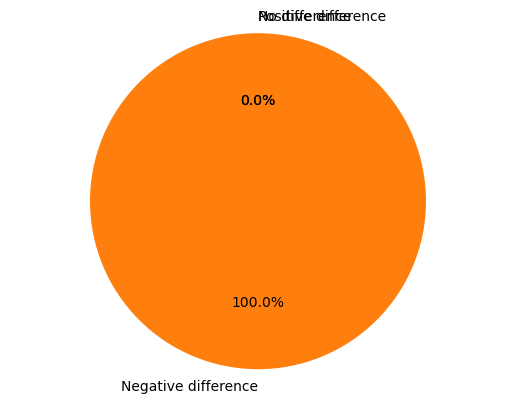

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# create two sample DataFrames
df1 = pd.DataFrame({'A': [10, 20, 30, 40, 50], 'B': ['a', 'b', 'c', 'd', 'e']})
df2 = pd.DataFrame({'A': [20, 30, 40, 50, 60], 'B': ['a', 'b', 'c', 'd', 'e']})

# compare the values in column 'A' between the two DataFrames
diff = df1['A'] - df2['A']

# create a pie chart to visualize the comparison
labels = ['Positive difference', 'Negative difference', 'No difference']
sizes = [len(diff[diff > 0]), len(diff[diff < 0]), len(diff[diff == 0])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle

plt.show()